In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Defining Problem Statement and Analysing basic metrics</h1>

<h3>We have to analize the data and give recommendation which type of movies and tv shows should be produced by netflix or should be streamed in netflix with the help of basic metrics like group by and different types of plots</h3>

In [2]:
netflix_data = pd.read_csv('netflix.csv')

In [3]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<h3>The first step is to unnesting the data in the columns</h3>

In [4]:
netflix_data['director'] = netflix_data['director'].str.split(', ')
netflix_data['cast'] = netflix_data['cast'].str.split(', ')
netflix_data['country'] = netflix_data['country'].str.split(', ')
netflix_data['listed_in']  = netflix_data['listed_in'].str.split(', ')

<h3>Here I have used the explode function inorder to unnest the data in the columns</h3>

In [5]:
new_netflix_data = netflix_data.explode('director')
new_netflix_data = new_netflix_data.explode('cast')
new_netflix_data = new_netflix_data.explode('country')
new_netflix_data = new_netflix_data.explode('listed_in')

In [6]:
new_netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [7]:
new_netflix_data.shape

(201991, 12)

<h3>from th eshape of the data it is clear that their are 201991 rows or data points or entries and 12 columns or features</h3>

In [8]:
new_netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201991 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       201991 non-null  object
 1   type          201991 non-null  object
 2   title         201991 non-null  object
 3   director      151348 non-null  object
 4   cast          199845 non-null  object
 5   country       190094 non-null  object
 6   date_added    201833 non-null  object
 7   release_year  201991 non-null  int64 
 8   rating        201924 non-null  object
 9   duration      201988 non-null  object
 10  listed_in     201991 non-null  object
 11  description   201991 non-null  object
dtypes: int64(1), object(11)
memory usage: 20.0+ MB


<h3>from the above info it is clear that except release_year every other feature is string data type and the release_year is int data type</h3>

In [9]:
new_netflix_data.isna().sum()

show_id             0
type                0
title               0
director        50643
cast             2146
country         11897
date_added        158
release_year        0
rating             67
duration            3
listed_in           0
description         0
dtype: int64

<h3>From the above cell it is clear that in the directors,cast,country,data_added,rating and duration features are having NAN values</h3>

In [10]:
new_netflix_data.describe()

,release_year
count,201991.000000
mean,2013.452891
std,9.003933
min,1925.000000
25%,2012.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


<h3>the starting year is 1925 the ending year is 2021 most of the movies are released between the years 2012 and 2021 as the difference between the mean and the median is not that great so their is no outlyer which is effecting the mean value</h3>

In [11]:
new_netflix_data.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,201991,201991,201991,151348,199845,190094,201833,201924,201988,201991,201991
unique,8807,2,8807,4993,36439,127,1767,17,220,42,8775
top,s7165,Movie,Kahlil Gibran's The Prophet,Martin Scorsese,Liam Neeson,United States,"January 1, 2020",TV-MA,1 Season,Dramas,A troubled young girl and her mother find sola...
freq,700,145843,700,419,161,59349,3730,73867,35035,29775,700


<h3>The Movie occurs 145843 times US has the most movies and tv shows combbined 59349 most of the movies are added on jan 1 2020 3730 TV-MA is the top rating </h3>

In [12]:
movie_netflix_data = new_netflix_data[new_netflix_data['type']=='Movie']

<h3>Here we generally dividing the data in to 2 data frames 1st for Movies and the 2nd for Tv Showsso that the analysis will be easy to perform</h3>

In [13]:
movie_netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,James Marsden,NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Sofia Carson,NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [14]:
movie_netflix_data.isna().sum()

show_id            0
type               0
title              0
director        1285
cast            1328
country         6199
date_added         0
release_year       0
rating             9
duration           3
listed_in          0
description        0
dtype: int64

In [15]:
tv_show_netflix_data = new_netflix_data[new_netflix_data['type']=='TV Show']

In [16]:
tv_show_netflix_data.isna().sum()

show_id             0
type                0
title               0
director        49358
cast              818
country          5698
date_added        158
release_year        0
rating             58
duration            0
listed_in           0
description         0
dtype: int64

<h2>Movie Recommendation Starts</h2>

In [17]:
movie_netflix_data['cast'].value_counts()

Liam Neeson        161
Alfred Molina      157
John Krasinski     138
Salma Hayek        130
Frank Langella     128
                  ... 
Sneha Koorse         1
Will Ryan            1
Steve Rosenbaum      1
Nina Richmond        1
Jason Beghe          1
Name: cast, Length: 25951, dtype: int64

<h3>here the Most frequently occuring actor is Liam Neeson followed by Alfred Molina</h3>

In [18]:
movie_netflix_data['director'].value_counts()

Martin Scorsese        419
Youssef Chahine        409
Cathy Garcia-Molina    356
Steven Spielberg       355
Lars von Trier         336
                      ... 
Halder Gomes             1
Mike Rossiter            1
Jerry Kolber             1
Catrin Einhorn           1
Brandon Jones            1
Name: director, Length: 4777, dtype: int64

<h3>Mosst frequent director is Martin Scorsese followed by Youssef Chahine</h3>

In [19]:
movie_netflix_data = movie_netflix_data.dropna()

<h3>Droping the NAN columns (droping is the treatment which I chose)</h3>

In [20]:
movie_netflix_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,"September 24, 2021",1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,"September 24, 2021",1993,TV-MA,125 min,Independent Movies,"On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,"September 24, 2021",1993,TV-MA,125 min,International Movies,"On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Ghana,"September 24, 2021",1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Ghana,"September 24, 2021",1993,TV-MA,125 min,Independent Movies,"On a photo shoot in Ghana, an American model s..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


In [21]:
movie_netflix_data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

<h3>The is to make sure that NAN values are droped </h3>

In [22]:
movie_netflix_data['duration'] = movie_netflix_data['duration'].apply(lambda x:int(str(x).split()[0]))

<h3>Here I am extracting the integer part of the duration using(lambda function) in side apply</h3>

In [23]:
movie_netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137532 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       137532 non-null  object
 1   type          137532 non-null  object
 2   title         137532 non-null  object
 3   director      137532 non-null  object
 4   cast          137532 non-null  object
 5   country       137532 non-null  object
 6   date_added    137532 non-null  object
 7   release_year  137532 non-null  int64 
 8   rating        137532 non-null  object
 9   duration      137532 non-null  int64 
 10  listed_in     137532 non-null  object
 11  description   137532 non-null  object
dtypes: int64(2), object(10)
memory usage: 13.6+ MB


<h3>now the int type data structures are 2 columns (release_year and duration)</h3>

In [24]:
movie_netflix_data = movie_netflix_data[pd.to_datetime(movie_netflix_data['date_added']).dt.year >= movie_netflix_data['release_year']]

<h3>Here I am removing the improper data such as the include year is before the release_year </h3>

In [25]:
movie_netflix_date = movie_netflix_data.drop(columns='description',inplace=True)

C:\Users\satis\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<h3>Droping the description column</h3>

In [26]:
movie_netflix_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,"September 24, 2021",1993,TV-MA,125,Dramas
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,"September 24, 2021",1993,TV-MA,125,Independent Movies
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,"September 24, 2021",1993,TV-MA,125,International Movies
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Ghana,"September 24, 2021",1993,TV-MA,125,Dramas
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Ghana,"September 24, 2021",1993,TV-MA,125,Independent Movies
...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111,International Movies
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111,Music & Musicals
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111,Dramas
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111,International Movies


In [100]:
movie_netflix_data.reset_index().reset_index().drop(columns='index',inplace=True)

In [101]:
movie_netflix_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,"September 24, 2021",1993,TV-MA,125,Dramas
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,"September 24, 2021",1993,TV-MA,125,Independent Movies
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,"September 24, 2021",1993,TV-MA,125,International Movies
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Ghana,"September 24, 2021",1993,TV-MA,125,Dramas
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Ghana,"September 24, 2021",1993,TV-MA,125,Independent Movies
...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111,International Movies
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111,Music & Musicals
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111,Dramas
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111,International Movies


In [30]:
movie_netflix_data.groupby('director')['cast'].count().sort_values(ascending=False)

director
Martin Scorsese        419
Youssef Chahine        409
Cathy Garcia-Molina    356
Steven Spielberg       355
Lars von Trier         336
                      ... 
Joana Mazzucchelli       1
Jim Gable                1
Jessica Yu               1
Natalia Valdebenito      1
Richard Mears            1
Name: cast, Length: 4165, dtype: int64

In [31]:
movie_netflix_data.drop_duplicates(keep='first',inplace=True)

C:\Users\satis\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<h3>Droping the duplicates and keeping the first appiring values</h3>

In [32]:
movie_netflix_data['director'].value_counts()

Martin Scorsese        419
Youssef Chahine        409
Cathy Garcia-Molina    356
Steven Spielberg       355
Lars von Trier         336
                      ... 
Richard Miron            1
Shawn Rech               1
Matthew Cooke            1
Will Lovelace            1
Leslie Iwerks            1
Name: director, Length: 4165, dtype: int64

In [33]:
movie_netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,"September 24, 2021",1993,TV-MA,125,Dramas
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,"September 24, 2021",1993,TV-MA,125,Independent Movies
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,"September 24, 2021",1993,TV-MA,125,International Movies
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Ghana,"September 24, 2021",1993,TV-MA,125,Dramas
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Ghana,"September 24, 2021",1993,TV-MA,125,Independent Movies


In [71]:
movie_netflix_data['duration'].unique()

array([125, 104, 127, 166, 103,  97, 106,  96, 124, 116,  98,  91, 115,
       122,  99,  88, 100, 102,  93,  95,  85,  83, 182, 147,  90, 128,
       143, 119, 114, 118, 108, 117, 121, 142, 113, 154, 120,  82,  94,
       109, 101, 105,  86, 229,  76,  89, 110, 156, 112, 129, 107, 135,
       136, 165, 150, 133, 145,  92,  64,  59, 111,  87, 148, 189, 141,
       130,  68, 131, 126, 155, 123,  84,  13,  77,  74,  49,  72,  78,
        70, 132, 140,  81, 138, 149,  15, 224, 162,  60,  65, 137,  75,
        32, 158, 164, 173, 181,  73,  24,  80, 139, 151,  22, 134,  58,
        52,  71, 161,  53,   8,  46,  57,  28,  66,  50,  79,  26,  54,
        48,  45, 171,  42,  27,  51,  69,  47,  33,  44,  29, 146,  61,
        63, 157, 203,  25,  30,  62, 194,  55, 177, 237, 195, 253, 152,
        67, 190, 160, 208, 180, 144, 174, 170, 192, 209, 187, 185, 172,
       186, 193, 176,  17,  56, 169,  40,  20,  12, 168, 153, 159, 214,
        31, 163,  14, 179,  38,  23,  43, 200, 196, 167,  41,  3

C:\Users\satis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


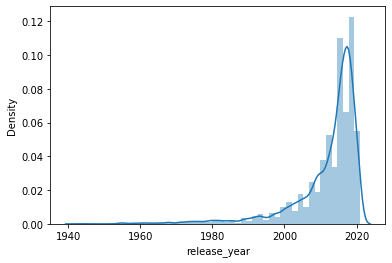

In [107]:
ax = sns.distplot(movie_netflix_data['release_year'])
plt.show()

<h3>Here we can see that movies releasing started increasing from the year 2000 and keep on increasing and decreased slightly</h3>

C:\Users\satis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


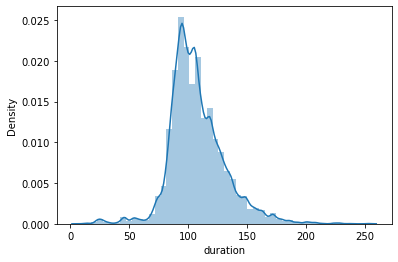

In [50]:
sns.distplot(movie_netflix_data['duration'])
plt.show()

<h3>most of the movies are around 100 minutes movies</h3>

In [125]:
# ax = sns.countplot(y='release_year',data=movie_netflix_data)
# plt.show()

In [126]:
# ax = sns.countplot(y='duration',data=movie_netflix_data)
# plt.show()

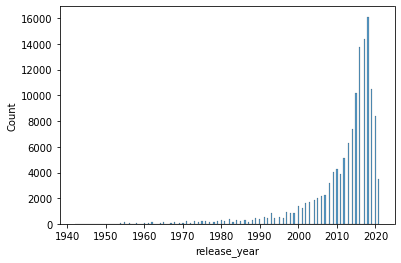

In [58]:
ax = sns.histplot(movie_netflix_data['release_year'])
plt.show()

<h3>From the histplot also it is confirmed that movies started increasing around the year 2000</h3>

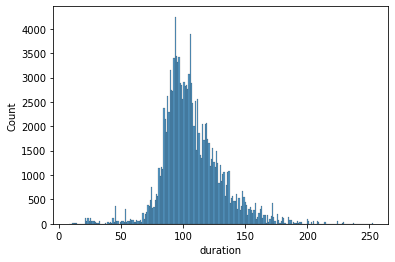

In [60]:
ax = sns.histplot(movie_netflix_data['duration'])
plt.show()

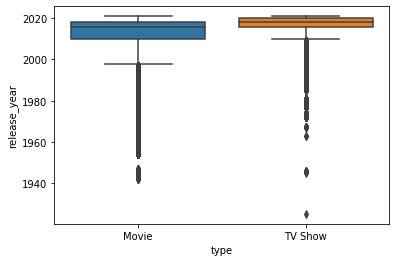

In [81]:
ax = sns.boxplot(x = 'type',y = 'release_year',data=new_netflix_data)
plt.show()

<h3>From the above box plot it is clear that at the high period of movies Tv shows started sslowly and increased gradually and surpassed moivies</h3>

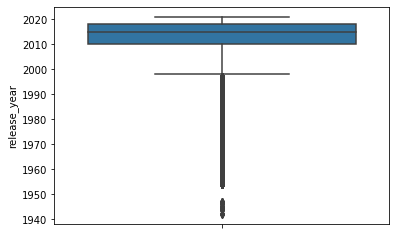

In [73]:
ax = sns.boxplot(y = 'release_year',data=movie_netflix_data)
plt.show()

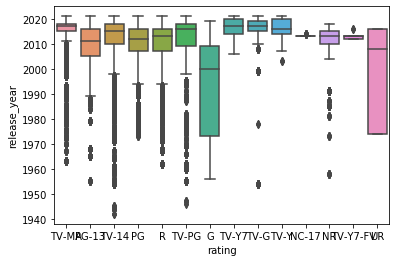

In [123]:
ax = sns.boxplot(x = 'rating',y = 'release_year',data=movie_netflix_data)
plt.show()

<h3>outlier are present in all of the ratings except G ,Y7and TV-R </h3>

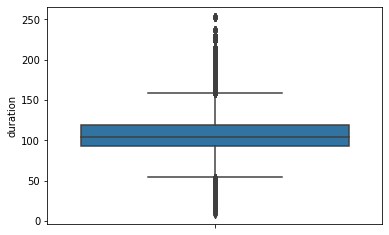

In [74]:
ax = sns.boxplot(y='duration',data=movie_netflix_data)

In [75]:
movie_netflix_data.corr()

,release_year,duration
release_year,1.000000,-0.231447
duration,-0.231447,1.000000


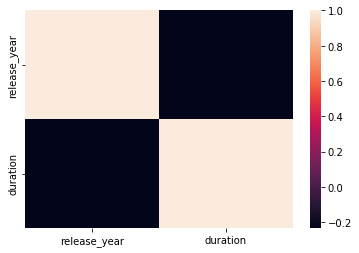

In [80]:
ax = sns.heatmap(movie_netflix_data.corr())

In [34]:
movie_netflix_data.groupby('director')['cast'].max().reset_index()

,director,cast
0,A. L. Vijay,Yogi Babu
1,A. Raajdheep,Yogi Babu
2,A. Salaam,Sulakshana Pandit
3,A.R. Murugadoss,S.J. Surya
4,Aadish Keluskar,Rohit Kokate
...,...,...
4160,Éric Warin,Terrence Scammell
4161,Ísold Uggadóttir,Patrik Nökkvi Pétursson
4162,Óskar Thór Axelsson,Þröstur Leó Gunnarsson
4163,Ömer Faruk Sorak,Şafak Sezer


<h3>The output of the above cell shows the favourite actor of that directors </h3>

In [35]:
movie_netflix_data.groupby('country')['cast'].max().reset_index()

,country,cast
0,,Walid Abdul Salam
1,Afghanistan,Sohrab Nazari
2,Albania,Marco Giallini
3,Algeria,Youssef Wahby
4,Angola,Raul Rosario
...,...,...
108,Vatican City,Pope Francis
109,Venezuela,Victoria Raposo
110,Vietnam,Truong Hoang Hanh Thy
111,West Germany,Zygmunt Zintel


<h3>The output of the above cell is country specific best actor(in terms of most number of movies acted in )</h3>

In [36]:
movie_netflix_data.groupby('listed_in')['director'].max().reset_index()

,listed_in,director
0,Action & Adventure,Ömer Faruk Sorak
1,Anime Features,Zhao Ji
2,Children & Family Movies,Éric Warin
3,Classic Movies,Youssef Chahine
4,Comedies,Şenol Sönmez
5,Cult Movies,Walter Hill
6,Documentaries,Zatella Beatty
7,Dramas,Şenol Sönmez
8,Faith & Spirituality,Wim Wenders
9,Horror Movies,Óskar Thór Axelsson


<h3>The output of the above cell is most no of movies directed by the director in that particular genre</h3>

In [37]:
movie_netflix_data.groupby('listed_in')['cast'].max().reset_index()

,listed_in,cast
0,Action & Adventure,Şafak Sezer
1,Anime Features,Zhang He
2,Children & Family Movies,İlknur Külahlıoglu
3,Classic Movies,Čestmír Řanda
4,Comedies,Şinasi Yurtsever
5,Cult Movies,Zulay Henao
6,Documentaries,Ángel Mosqueda
7,Dramas,Şükrü Özyıldız
8,Faith & Spirituality,Zaskia Adya Mecca
9,Horror Movies,Ṣọpẹ́ Dìrísù


<h3>The output of the above cell is most no of movies acted by the actor in that particular genre</h3>

In [122]:
# movie_netflix_data.groupby('listed_in')['director'].max().reset_index()

In [39]:
movie_netflix_data.groupby('country')['listed_in'].max().reset_index()

,country,listed_in
0,,International Movies
1,Afghanistan,International Movies
2,Albania,International Movies
3,Algeria,International Movies
4,Angola,International Movies
...,...,...
108,Vatican City,International Movies
109,Venezuela,Thrillers
110,Vietnam,Thrillers
111,West Germany,Thrillers


<h3>The output of the above cell shows which type of genre is most popolar in that particular country</h3>

In [40]:
movie_netflix_data.groupby('country')['director'].max().reset_index()

,country,director
0,,Najwa Najjar
1,Afghanistan,Pieter-Jan De Pue
2,Albania,Antonio Morabito
3,Algeria,Youssef Chahine
4,Angola,Maradona Dias Dos Santos
...,...,...
108,Vatican City,Wim Wenders
109,Venezuela,Sebastián Schindel
110,Vietnam,Victor Vu
111,West Germany,Mel Stuart


<h3>The output of the above cell is most number of movies directed by the director in his country</h3>

In [41]:
movie_netflix_data.groupby('director')['duration'].max().sort_values(ascending=False).reset_index()

,director,duration
0,Houssam El-Din Mustafa,253
1,Samir Al Asfory,237
2,Sergio Leone,229
3,Raj Kapoor,228
4,Ashutosh Gowariker,224
...,...,...
4160,Harry Chaskin,14
4161,Mathieu Auvray,12
4162,Floyd Russ,12
4163,Timothy Ware-Hill,8


<h3>Maximum length of movie directed by the director</h3>

<h1>This recomendatin is for the country Vietnam we can draw the similar conclusions for the above data to the remaining countries as well</h1>

<h2>for Example if we want to recommend a movie in the country Vietnam as per the data triller movies are most popular in that country so it is best to release triller movies in that country.</h2>
 <h2>When comes to the director Victor Vu is the popular director so the movies directed by him are most likely to get outreacch in vietnam</h2>
    <h2>When comes to the actor Truong Hoang Hanh Thy is the famous actor in the country so it is best to release his movies inn the vietnam.</h2>

<h2>Tv show Recommendation Starts</h2>

In [82]:
tv_show_netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."


In [85]:
tv_show_netflix_data['cast'].value_counts()

David Attenborough    82
Takahiro Sakurai      56
Yuki Kaji             45
Ai Kayano             41
Junichi Suwabe        39
                      ..
Andrea Savage          1
Tracee Ellis Ross      1
Mousam                 1
Alexa Alemanni         1
Shawtane Bowen         1
Name: cast, Length: 14863, dtype: int64

<h3>The highest number of Tv shows was acted by the acter David Attenborough followed by Takahiro Sakurai</h3>

In [89]:
tv_show_netflix_data = tv_show_netflix_data.dropna()

<h3>Drop the columns with the values NAN</h3>

In [90]:
tv_show_netflix_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,Mel Giedroyc,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,British TV Shows,A talented batch of amateur bakers face off in...
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,Mel Giedroyc,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,Reality TV,A talented batch of amateur bakers face off in...
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,Sue Perkins,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,British TV Shows,A talented batch of amateur bakers face off in...
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,Sue Perkins,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,Reality TV,A talented batch of amateur bakers face off in...
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,Mary Berry,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,British TV Shows,A talented batch of amateur bakers face off in...
...,...,...,...,...,...,...,...,...,...,...,...,...
8599,s8600,TV Show,Toast of London,Michael Cumming,Harry Peacock,United Kingdom,"September 1, 2017",2015,TV-MA,3 Seasons,Classic & Cult TV,"After a divorce and fatal career move, a class..."
8599,s8600,TV Show,Toast of London,Michael Cumming,Harry Peacock,United Kingdom,"September 1, 2017",2015,TV-MA,3 Seasons,TV Comedies,"After a divorce and fatal career move, a class..."
8599,s8600,TV Show,Toast of London,Michael Cumming,Tracy Ann Oberman,United Kingdom,"September 1, 2017",2015,TV-MA,3 Seasons,British TV Shows,"After a divorce and fatal career move, a class..."
8599,s8600,TV Show,Toast of London,Michael Cumming,Tracy Ann Oberman,United Kingdom,"September 1, 2017",2015,TV-MA,3 Seasons,Classic & Cult TV,"After a divorce and fatal career move, a class..."


In [91]:
tv_show_netflix_data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

<h3>This is to confirm the droping of NAN values</h3>

In [92]:
tv_show_netflix_data = tv_show_netflix_data[pd.to_datetime(tv_show_netflix_data['date_added']).dt.year >= tv_show_netflix_data['release_year']]

<h3>Removing the rows with data added is before the release date</h3>

In [93]:
tv_show_netflix_date = tv_show_netflix_data.drop(columns='description',inplace=True)

C:\Users\satis\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<h3>Droping the column description</h3>

In [94]:
tv_show_netflix_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,Mel Giedroyc,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,British TV Shows
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,Mel Giedroyc,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,Reality TV
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,Sue Perkins,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,British TV Shows
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,Sue Perkins,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,Reality TV
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,Mary Berry,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,British TV Shows
...,...,...,...,...,...,...,...,...,...,...,...
8599,s8600,TV Show,Toast of London,Michael Cumming,Harry Peacock,United Kingdom,"September 1, 2017",2015,TV-MA,3 Seasons,Classic & Cult TV
8599,s8600,TV Show,Toast of London,Michael Cumming,Harry Peacock,United Kingdom,"September 1, 2017",2015,TV-MA,3 Seasons,TV Comedies
8599,s8600,TV Show,Toast of London,Michael Cumming,Tracy Ann Oberman,United Kingdom,"September 1, 2017",2015,TV-MA,3 Seasons,British TV Shows
8599,s8600,TV Show,Toast of London,Michael Cumming,Tracy Ann Oberman,United Kingdom,"September 1, 2017",2015,TV-MA,3 Seasons,Classic & Cult TV


In [97]:
tv_show_netflix_data.reset_index().drop(columns='index',inplace=True)

In [98]:
tv_show_netflix_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,Mel Giedroyc,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,British TV Shows
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,Mel Giedroyc,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,Reality TV
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,Sue Perkins,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,British TV Shows
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,Sue Perkins,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,Reality TV
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,Mary Berry,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,British TV Shows
...,...,...,...,...,...,...,...,...,...,...,...
8599,s8600,TV Show,Toast of London,Michael Cumming,Harry Peacock,United Kingdom,"September 1, 2017",2015,TV-MA,3 Seasons,Classic & Cult TV
8599,s8600,TV Show,Toast of London,Michael Cumming,Harry Peacock,United Kingdom,"September 1, 2017",2015,TV-MA,3 Seasons,TV Comedies
8599,s8600,TV Show,Toast of London,Michael Cumming,Tracy Ann Oberman,United Kingdom,"September 1, 2017",2015,TV-MA,3 Seasons,British TV Shows
8599,s8600,TV Show,Toast of London,Michael Cumming,Tracy Ann Oberman,United Kingdom,"September 1, 2017",2015,TV-MA,3 Seasons,Classic & Cult TV


In [102]:
tv_show_netflix_data.groupby('director')['cast'].count().sort_values(ascending=False)

director
Noam Murro         189
Thomas Astruc      160
Alan Poul          104
Houda Benyamina    104
Laïla Marrakchi    104
                  ... 
Mick Grogan          2
Eric Abrams          1
Oliver Stone         1
Glenn Weiss          1
Michael Simon        1
Name: cast, Length: 190, dtype: int64

In [104]:
tv_show_netflix_data.drop_duplicates(keep='first',inplace=True)

C:\Users\satis\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [105]:
tv_show_netflix_data['director'].value_counts()

Noam Murro         189
Thomas Astruc      160
Houda Benyamina    104
Laïla Marrakchi    104
Damien Chazelle    104
                  ... 
Tig Notaro           2
Oliver Stone         1
Eric Abrams          1
Glenn Weiss          1
Michael Simon        1
Name: director, Length: 190, dtype: int64

In [106]:
tv_show_netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,Mel Giedroyc,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,British TV Shows
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,Mel Giedroyc,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,Reality TV
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,Sue Perkins,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,British TV Shows
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,Sue Perkins,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,Reality TV
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,Mary Berry,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,British TV Shows


C:\Users\satis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


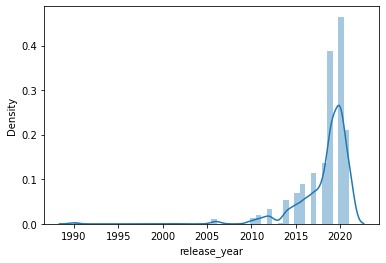

In [108]:
ax = sns.distplot(tv_show_netflix_data['release_year'])
plt.show()

<h3>most no of Tv shows started increasing around 2010 and keeps on increasing from their on </h3>

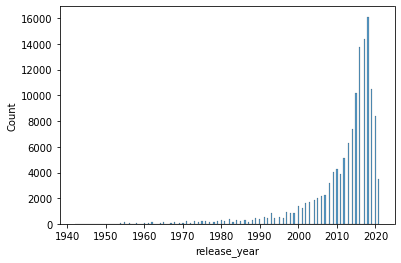

In [110]:
ax = sns.histplot(movie_netflix_data['release_year'])
plt.show()

<h3>most no of Tv shows started increasing around 2010 and keeps on increasing from their on </h3>

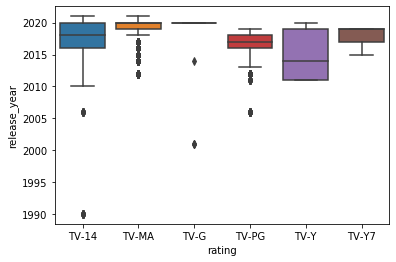

In [111]:
ax = sns.boxplot(x = 'rating',y = 'release_year',data=tv_show_netflix_data)
plt.show()

<h3>TV-G is having the least rated used to rate the movie both the TV-Y and TV-Y7 are not having any outliers most outliers are having in the rating TV-14 followed by TV-G</h3>

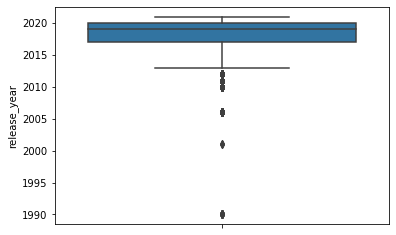

In [112]:
ax = sns.boxplot(y = 'release_year',data=tv_show_netflix_data)
plt.show()

<h3>25% is around 2016 50% is around 2018 75% is around 2020 ie., most number of tv shows are produced in the year 2020 and 2021 </h3>

In [113]:
tv_show_netflix_data.groupby('director')['cast'].max().reset_index()

,director,cast
0,Adrien Lagier,Fary
1,Ahmet Katıksız,İlkin Tüfekçi
2,Alan Poul,Tchéky Karyo
3,Alastair Fothergill,David Attenborough
4,Alejandro Lozano,Raúl Méndez
...,...,...
185,Wouter Bouvijn,Zouzou Ben Chikha
186,YC Tom Lee,Wen Chen-ling
187,Yasuhiro Irie,Yuji Ueda
188,Yim Pilsung,Shim Dal-gi


<h3>The most favorite actor for the director is listed above</h3>

In [115]:
tv_show_netflix_data.groupby('country')['cast'].max().reset_index()

,country,cast
0,Argentina,Sebastián Wainraich
1,Australia,Tess Haubrich
2,Belgium,Zouzou Ben Chikha
3,Brazil,Yasmin Thayná
4,Canada,Wyatt White
5,China,Zhu Rongrong
6,Colombia,Álvaro Bayona
7,Denmark,William Rützou
8,France,Tony Sampson
9,Germany,Tchéky Karyo


<h3>Most number of tv shows acted by the actor in his country </h3>

In [116]:
tv_show_netflix_data.groupby('listed_in')['director'].max().reset_index()

,listed_in,director
0,Anime Series,Yasuhiro Irie
1,British TV Shows,Toby Haynes
2,Classic & Cult TV,Phil Sgriccia
3,Crime TV Shows,Ziad Doueiri
4,Docuseries,Simon Frederick
5,International TV Shows,Ziad Doueiri
6,Kids' TV,Tony Collingwood
7,Korean TV Shows,Yim Pilsung
8,Reality TV,Michael Simon
9,Romantic TV Shows,Takuya Igarashi


<h3>Most number of tv shows Directed by the director in the Genre</h3>

In [117]:
tv_show_netflix_data.groupby('listed_in')['cast'].max().reset_index()

,listed_in,cast
0,Anime Series,Yusuke Kobayashi
1,British TV Shows,Álvaro Cervantes
2,Classic & Cult TV,Tracy Ann Oberman
3,Crime TV Shows,İlkin Tüfekçi
4,Docuseries,Zachary Booth
5,International TV Shows,İştar Gökseven
6,Kids' TV,Wyatt White
7,Korean TV Shows,Yun Seo-hyun
8,Reality TV,Sue Perkins
9,Romantic TV Shows,İştar Gökseven


<h3>Most number of tv shows acted by the actor in the Genre</h3>

In [124]:
#tv_show_netflix_data.groupby('listed_in')['director'].max().reset_index()

In [119]:
tv_show_netflix_data.groupby('country')['listed_in'].max().reset_index()

,country,listed_in
0,Argentina,TV Comedies
1,Australia,TV Dramas
2,Belgium,TV Dramas
3,Brazil,TV Mysteries
4,Canada,Teen TV Shows
5,China,TV Dramas
6,Colombia,Spanish-Language TV Shows
7,Denmark,TV Dramas
8,France,TV Dramas
9,Germany,TV Dramas


<h3>country specific most liked Genre</h3>

In [120]:
tv_show_netflix_data.groupby('country')['director'].max().reset_index()

,country,director
0,Argentina,Hernán Guerschuny
1,Australia,Mat King
2,Belgium,Wouter Bouvijn
3,Brazil,Pedro Waddington
4,Canada,Tony Collingwood
5,China,He Xiaofeng
6,Colombia,Luis Alberto Restrepo
7,Denmark,Stephen Murray
8,France,Ziad Doueiri
9,Germany,Laïla Marrakchi


<h3>Most number of Tv shows directed by the director in his country </h3>

In [121]:
tv_show_netflix_data.groupby('director')['duration'].max().sort_values(ascending=False).reset_index()

,director,duration
0,Philippa Lowthorpe,9 Seasons
1,Andy Devonshire,9 Seasons
2,Hayato Date,9 Seasons
3,James Bamford,8 Seasons
4,Jay Chandrasekhar,8 Seasons
...,...,...
185,Kongkiat Khomsiri,1 Season
186,Kobun Shizuno,1 Season
187,Yim Pilsung,1 Season
188,Kim Jong-kwan,1 Season


<h3>most number of seasons produced by the director </h3>

<h1>This recomendation is for the country Turkey we can draw the similar conclusions for the above data to the remaining countries as well</h1>

<h2>for Example if we want to recommend a Tv shows in the country Turkey as per the data The triller TV shows are most popular in that country so it is best to release the triller Tv shows in that country.</h2>
 <h2>When comes to the director Seren Yüce is the popular director so the movies directed by him are most likely to get outreacch in Turkey</h2>
    <h2>When comes to the actor İştar Gökseven is the famous actor in the country so it is best to release his movies in Turkey.</h2>